## 数据处理

In [48]:
# 导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
%matplotlib inline

In [50]:
# 读取csv数据
dau = pd.read_csv('data/section3-dau.csv')
dpu = pd.read_csv('data/section3-dpu.csv')
install = pd.read_csv('data/section3-install.csv')

In [51]:
# 查看数据
dau.head()

,log_date,app_name,user_id
0,2013-06-01,game-01,116
1,2013-06-01,game-01,13491
2,2013-06-01,game-01,7006
3,2013-06-01,game-01,117
4,2013-06-01,game-01,13492


In [52]:
dpu.head()

,log_date,app_name,user_id,payment
0,2013-06-01,game-01,351,1333
1,2013-06-01,game-01,12796,81
2,2013-06-01,game-01,364,571
3,2013-06-01,game-01,13212,648
4,2013-06-01,game-01,13212,1142


In [53]:
install.head()

,install_date,app_name,user_id
0,2013-04-15,game-01,1
1,2013-04-15,game-01,2
2,2013-04-15,game-01,3
3,2013-04-15,game-01,4
4,2013-04-15,game-01,5


In [54]:
# 合并DAU和install数据
dau_install = pd.merge(dau, install, on=['user_id', 'app_name'])

# 合并上述数据和DPU数据
dau_install_payment = pd.merge(dau_install, dpu, how='left', on=['log_date', 'app_name', 'user_id'])

In [55]:
dau_install.head()

,log_date,app_name,user_id,install_date
0,2013-06-01,game-01,116,2013-04-17
1,2013-06-02,game-01,116,2013-04-17
2,2013-06-03,game-01,116,2013-04-17
3,2013-06-04,game-01,116,2013-04-17
4,2013-06-05,game-01,116,2013-04-17


In [56]:
dau_install_payment.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-02,game-01,116,2013-04-17,NaN
2,2013-06-03,game-01,116,2013-04-17,NaN
3,2013-06-04,game-01,116,2013-04-17,NaN
4,2013-06-05,game-01,116,2013-04-17,NaN


In [57]:
# 查看payment不为空数据
dau_install_payment[dau_install_payment['payment'].notnull()].head()

,log_date,app_name,user_id,install_date,payment
86,2013-06-02,game-01,117,2013-04-17,1333.0
87,2013-06-02,game-01,117,2013-04-17,571.0
95,2013-06-10,game-01,117,2013-04-17,952.0
96,2013-06-11,game-01,117,2013-04-17,1333.0
97,2013-06-11,game-01,117,2013-04-17,571.0


In [58]:
# 将未消费用户的消费金额设置为零
dau_install_payment['payment'] = dau_install_payment['payment'].fillna(0)

In [59]:
dau_install_payment.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0


In [60]:
# 增加两列表示月份
dau_install_payment['log_month'] = dau_install_payment['log_date'].map(lambda x: x[0: 7])
dau_install_payment['install_month'] = dau_install_payment['install_date'].map(lambda x: x[0: 7])

In [61]:
# 按使用月份、用户ID和首次使用月份分组汇总消费金额合计
mau_payment = dau_install_payment.groupby(['log_month', 'user_id', 'install_month'], as_index=False).agg({'payment': 'sum'})

In [62]:
mau_payment.head()

,log_month,user_id,install_month,payment
0,2013-06,1,2013-04,0.0
1,2013-06,2,2013-04,0.0
2,2013-06,3,2013-04,14994.0
3,2013-06,4,2013-04,0.0
4,2013-06,6,2013-04,0.0


In [63]:
# 增加识别新用户和已有用户
mau_payment['user_type'] = np.where(mau_payment['log_month'] == mau_payment['install_month'], 'install', 'existing')

In [64]:
mau_payment.head()

,log_month,user_id,install_month,payment,user_type
0,2013-06,1,2013-04,0.0,existing
1,2013-06,2,2013-04,0.0,existing
2,2013-06,3,2013-04,14994.0,existing
3,2013-06,4,2013-04,0.0,existing
4,2013-06,6,2013-04,0.0,existing


## 统计分析

In [65]:
# 按月份和用户类型分组求消费金额合计
mau_paymnet_summary = mau_payment.groupby(['log_month', 'user_type'], as_index=False).agg({'payment': 'sum'})

In [66]:
mau_paymnet_summary

,log_month,user_type,payment
0,2013-06,existing,177886.0
1,2013-06,install,49837.0
2,2013-07,existing,177886.0
3,2013-07,install,29199.0


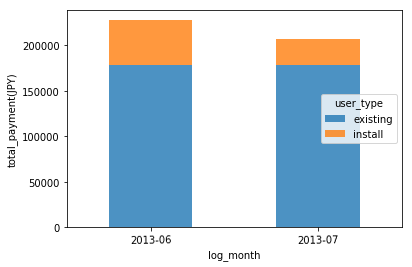

In [67]:
# 按使用月份和用户类型分组汇总消费金额绘制叠加柱状图
mau_payment.pivot_table(index='log_month', columns='user_type', values='payment',
                        aggfunc='sum').plot(kind='bar', stacked=True, alpha=0.8, rot=True)

plt.ylabel('total_payment(JPY)')
plt.legend(title='user_type', loc='center right')
plt.show()

In [141]:
from matplotlib.pyplot import MultipleLocator

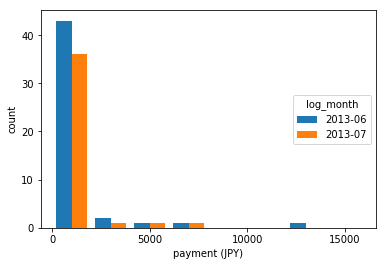

In [150]:
# 对比不同月份消费金额分布
install_payment = mau_payment[(mau_payment['payment'] > 0) & (mau_payment['user_type'] == 'install')]
data1 = install_payment[install_payment['log_month'] == '2013-06']['payment']
data2 = install_payment[install_payment['log_month'] == '2013-07']['payment']

bins = np.arange(0, 18000, 2000) # 设置分割的宽度，如果设成1000那么出来的图分布会不一样

plt.hist([data1.values, data2.values], bins=bins, label=['2013-06', '2013-07'])
plt.legend(title='log_month', loc='center right', )
plt.xlabel('payment (JPY)')
plt.ylabel('count')

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5000)) # 设置x轴间隔
plt.show()